In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
##Numpy arrays are multidimensional arrays (ndarrays) which are very widely used
##for basically 2 reasons
##(i) have built in methods to execute commonly used linear algebra operations
##note that in this context, nd arrays typically represent vectors, matricies, or tensors from math though
## its not always that case that the items in side an ndarray are #s
X = np.eye(3)
print(X)
X.transpose()
np.linalg.cholesky(X)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
## (ii) Numpy arrays support broadcastin of many common operations
# broadcasting is the applic of operation to each element in a collection of items 
# when that operation is applied to the collection
X = np.eye(3) #make a ndarray
Y = np.ones([3,3])
print(Y)
print(X+Y) #elementwise addition
print((2*Y)**2) #square each elment in matrix

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]
[[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]


In [5]:
##Access elements in an ndarray with typical indexing, rows then columns for matricies:
X = np.eye(3)
print(X[0,1]) #returns the element in the 0th row, 1st col
## Can use slice indexing to access ranges of elements, though be careful with upper bound on this index
print(X[0:2,0:2]) ##returns element in rows 0 through 1, col 0 through 2 :()

X[:,1] ##returns all emeents in column 1

0.0
[[1. 0.]
 [0. 1.]]


array([0., 1., 0.])

[Grading goes faster if we can easily see your results. Make sure that you turn in a copy of your notebook file with all cells executed]

## Q1: Practice with numpy

In this question we will be practicing with indexing numpy arrays.  Given the numpy matrix (ndarray) numbers, defined below, your first task (part A) will be to describe in words what each code cell will output (ideally without running the code cell first...).  In part B, you will be asked to write code that returns certain elements of this numpy array.

In [19]:
numbers = np.array([[1, 2, 3, 4],
                       [5, 6, 7, 8],
                       [9, 10, 11, 12]])

### A. Describe expressions.

After each expression there is an empty comment. Use this comment to describe what the expression returns. The first one is given to you as an example.

In [ ]:
numbers[0,0]

## [Example answer] This returns the first element of the first row.

In [ ]:
numbers[1,2:4]

## Returns the 3rd and 4th element of the 2nd row

In [ ]:
numbers[:,3]

## returns all the elements of the last (4th) column in each row

In [ ]:
numbers ** 2

## squares every elment in the array

In [ ]:
numbers[0,:] + numbers[1,:]

## add the first 2 rows

In [ ]:
numbers[:,0] * numbers[:,1]

##  multiplies all the elments of the first column by the 2nd column

In [24]:
numbers[:,0].dot(numbers[:,1])

## multiply the first 2 columns

122

In [23]:
print(2+30+90)

122


In [ ]:
numbers.sum(axis=0)

## sum every column

In [ ]:
numbers.sum(axis=1)

## sum every row

### B. Write expressions

In this section each block will contain a comment describing a result, you will write code to generate that result.

In [ ]:
numbers = numpy.array([[1, 2, 3, 4],
                       [5, 6, 7, 8],
                       [9, 10, 11, 12]])

In [ ]:
## return 10

print(numbers[2:,1])
sum(numbers[0,:])

In [40]:
## return array([5, 9])

numbers[1:,0]

array([5, 9])

In [ ]:
## return array([[7, 8], [11, 12]])

numbers[1:3,2:4]

In [14]:
## return array([[14, 16], [22, 24]])

numbers[1:3,2:4]*2

array([[14, 16],
       [22, 24]])

In [148]:
## return array([[0., 0.69314718], [1.60943791, 1.79175947]])
## (hint: what is log(2)?)

np.log(numbers[0,:2]),np.log(numbers[1,:2])

(array([0.        , 0.69314718]), array([1.60943791, 1.79175947]))

In [150]:
## return the sum of the squares of the first row
## (hint: use dot())
# print(1 + 4 + 9 + 16)
# numbers[0,:1]
# sum()
numbers[:,0].dot(numbers[:,1])

122

In [28]:
## return the square of the sums of the columns
numbers.sum(axis=0)**2

array([225, 324, 441, 576], dtype=int32)

In [29]:
## return the mean of the columns (numpy.mean() works like numpy.sum())
numbers.mean(axis=0)

array([5., 6., 7., 8.])

## Q2: Covariance, correlation, regression

A. Write a function called `generate_linear` that takes four arguments: a sample size ($n$), a slope ($m$), an intercept ($b$), and an error scale ($s$). It should return a numpy array with $n$ rows and 2 columns. The first column ($X$) should be $n$ values from a normal distribution with mean 0 and standard deviation 1. The second column ($Y$) should be $mx + b$ plus $s$ times a second array of $n$ values from a standard normal distribution (mean 0, std 1). (See notes for an example)

Test this by generating a dataset with $n=100, m=-0.5, b=1.0, s=0.2$. Plot this dataset using `pyplot.scatter()`.

In [48]:
from matplotlib import pyplot

In [130]:
## Answer here

def generate_linear(n,m,b,s):
    x = np.random.normal(0,1,size=n) 
    error = np.random.normal(0, 1, size=n)
    y = x * m + b + (error*s)
    a = np.column_stack([x,y])
    #print(a.shape)
    return a


[]

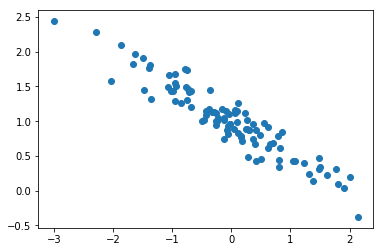

In [131]:
from matplotlib import pyplot
n=100
m=-0.5
b=1.0
s=0.2
a = generate_linear(n,m,b,s)
pyplot.scatter(a[:,0],a[:,1])
pyplot.plot()
#print(a)

B. Write a function called `regression` that takes a two-column (ie $X, Y$) numpy array and returns a tuple containing the covariance of the two variables, the variance of $X$, and the estimated slope parameter of a linear regression $\hat{m}$ ($cov(X,Y)/var(X)$). You may use code from class notes. Test this function by displaying the result for the dataset you created in part A.

In [132]:
## Answer here

def regression(a):
    cov_matrix = np.cov(a[:,0],a[:,1])
    cov = cov_matrix[1,0]
    varX= cov_matrix[0,0]
    m = cov / varX
    tup = (cov, varX, m)
    return tup


In [133]:
regression(a)

(-0.46901680012099184, 0.953193371214833, -0.49204790369370255)

C. Write code to generate five datasets for each combination of the following parameter values: $m \in \{1, 0.25, 0.05\}, n \in \{10, 100, 1000\}, s \in \{0.01, 0.1, 1.0\}$. (Use $b$ = 0.) For each dataset print the parameter settings using a formatted string and the estimated regression slope $\hat{m}$. Do not show floating point numbers with more than four decimal places.

In [151]:
## Answer here
b = 0
for m in [1,0.25,0.05]:
    for n in [10,100,1000]:
        for s in [0.01,0.1,1.0]:
            for i in range(5):
                a = generate_linear(n,m,b,s)
                r= regression(a)
                print ('m: ',m,'n: ',n,'s: ',s, 'b: 0', 'm̂: ', "%.4f" % r[2], "Diff: ", "%.4f" % abs(r[2]-m))

m:  1 n:  10 s:  0.01 b: 0 m̂:  0.9924 Diff:  0.0076
m:  1 n:  10 s:  0.01 b: 0 m̂:  0.9953 Diff:  0.0047
m:  1 n:  10 s:  0.01 b: 0 m̂:  0.9948 Diff:  0.0052
m:  1 n:  10 s:  0.01 b: 0 m̂:  0.9987 Diff:  0.0013
m:  1 n:  10 s:  0.01 b: 0 m̂:  0.9979 Diff:  0.0021
m:  1 n:  10 s:  0.1 b: 0 m̂:  1.0224 Diff:  0.0224
m:  1 n:  10 s:  0.1 b: 0 m̂:  1.1031 Diff:  0.1031
m:  1 n:  10 s:  0.1 b: 0 m̂:  0.9901 Diff:  0.0099
m:  1 n:  10 s:  0.1 b: 0 m̂:  0.9970 Diff:  0.0030
m:  1 n:  10 s:  0.1 b: 0 m̂:  1.0018 Diff:  0.0018
m:  1 n:  10 s:  1.0 b: 0 m̂:  0.9398 Diff:  0.0602
m:  1 n:  10 s:  1.0 b: 0 m̂:  0.4930 Diff:  0.5070
m:  1 n:  10 s:  1.0 b: 0 m̂:  1.4500 Diff:  0.4500
m:  1 n:  10 s:  1.0 b: 0 m̂:  1.4537 Diff:  0.4537
m:  1 n:  10 s:  1.0 b: 0 m̂:  1.4068 Diff:  0.4068
m:  1 n:  100 s:  0.01 b: 0 m̂:  1.0003 Diff:  0.0003
m:  1 n:  100 s:  0.01 b: 0 m̂:  1.0011 Diff:  0.0011
m:  1 n:  100 s:  0.01 b: 0 m̂:  1.0021 Diff:  0.0021
m:  1 n:  100 s:  0.01 b: 0 m̂:  0.9996 Diff:  0.0004

D. Are you able to estimate the slope parameter reliably in the presence of noisy data? How is the quality of your estimate affected by sample size $n$, "effect size" (ie $m$), and degree of noise (ie $s$)?

Answer here:

The greater the sample size the more data there exists and thus the more reliable our data is because we can reduce the influence of outliers (data sets with higher erros). The greater the degree of noise the less reliable our data becomes because there is a greater chance for a data point to be an outlier (have a higher error deviation ) The effect size (m) or slope in this case doesn't neccessarily impact the reliability of the values.

## Q3: Spurious correlations

If you have enough data sets, you can find connections between surprising variables through random chance. The website [Spurious Correlations](http://www.tylervigen.com/spurious-correlations) by Tyler Vigen contains many of these. Here is one such comparison, the average number of pounds of cheese consumed per year per person and the number of people who died after getting tangled in the sheets of their bed.

Write code to calculate the correlation between these variables, and print the result.

In [72]:
bedsheet_tanglings = np.array([327, 456, 509, 497, 506, 573, 661, 741, 809, 717])
cheese_per_capita = np.array([29.8, 30.1, 30.5, 30.6, 31.3, 31.7, 32.6, 33.1, 32.7, 32.8])

In [73]:
## Calculate and print the Pearson correlation coefficient between these two variables here

In [143]:
a = np.corrcoef(bedsheet_tanglings,cheese_per_capita)
print("Pearson Correlation Coefficient: ", a[0,1])

Pearson Correlation Coefficient:  0.9448891469341408


Are you convinced that cheese consumption is predictive of bedsheet tangling deaths? Why or why not?

Answer here: Since the value is very close to one there does appear to be a correlation between both of these variables (bedsheet tanglings and cheese per capita). But logically speaking this is most likely just by chance as correlation doesn't neccessarily mean causation. The site this data comes from appears to gather hundreds of sets of data and see if there ever is a correlation with a relatively small sample size. Ofcoarse of the billions of unrelated variables that exist, there will often be a strong correlation between 2 unrelated variables just by chance and not by causation
